**DATASET 1**

Books Dataset from the source local file:

In [29]:
import pandas as pd
import numpy as np

# Load the JSON file into a Pandas DataFrame
json_file_path = '/content/books.json'

# Read a JSON file with multiple records into a Pandas DataFrame using 'pd.read_json' with 'lines=True'.
df = pd.read_json(json_file_path, lines=True)

In [30]:
# Check for null values in each column
null_value = df.isnull().sum()

# Display the null values count for each column
print(null_value)

_id                   0
title                 0
isbn                  3
pageCount             0
publishedDate        78
thumbnailUrl         20
shortDescription    271
longDescription     168
status                0
authors               0
categories            0
dtype: int64


In [31]:
# Define a list of representations for null values
null_representations = ['null', '', None, 'NaN']

# Replace various representations of null values with np.nan
df.replace(null_representations, np.nan, inplace=True)


In [32]:
# Convert 'publishedDate' to a datetime column
df['publishedDate'] = pd.to_datetime(df['publishedDate'], errors='coerce')

# Replace NaT (Not a Time) values with the desired value
new_value = pd.to_datetime("2011-01-14T00:00:00.000-0800")
df['publishedDate'].fillna(new_value, inplace=True)

In [33]:
# List of column names to be dropped from the DataFrame
columns_to_drop = ['longDescription', 'shortDescription', 'thumbnailUrl','isbn', 'categories']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

In [34]:
# Remove '[]' around the authors
df['authors'] = df['authors'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

In [35]:
# Specify the number of rows to exclude from the tail for data cleaning
rows_to_exclude = 32

# Create a new DataFrame with only the desired rows
new_df = df.iloc[:-rows_to_exclude, :]

In [36]:
# Calculate the mean (average) value of the 'pageCount' column and round it
average_page_count = round(df['pageCount'].mean())

# Replace 0 values in the 'pageCount' column with the rounded average value
df['pageCount'].replace(0, average_page_count, inplace=True)

In [37]:
# Extract the year from the 'publishedDate' column
new_df['publishedYear'] = new_df['publishedDate'].apply(lambda x: x.year if pd.notna(x) else pd.NaT)

<ipython-input-37-39c524df86fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['publishedYear'] = new_df['publishedDate'].apply(lambda x: x.year if pd.notna(x) else pd.NaT)


In [38]:
# Display the output for the new dataframe
new_df

,_id,title,pageCount,publishedDate,status,authors,publishedYear
0,1,Unlocking Android,416,2011-01-14 00:00:00-08:00,PUBLISH,"W. Frank Ableson, Charlie Collins, Robi Sen",2011
1,2,"Android in Action, Second Edition",592,2011-01-14 00:00:00-08:00,PUBLISH,"W. Frank Ableson, Robi Sen",2011
2,3,Specification by Example,289,2011-01-14 00:00:00-08:00,PUBLISH,Gojko Adzic,2011
3,4,Flex 3 in Action,576,2011-01-14 00:00:00-08:00,PUBLISH,"Tariq Ahmed with Jon Hirschi, Faisal Abid",2011
4,5,Flex 4 in Action,600,2011-01-14 00:00:00-08:00,PUBLISH,"Tariq Ahmed, Dan Orlando, John C. Bland II, Jo...",2011
...,...,...,...,...,...,...,...
394,785,Practical Probabilistic Programming,289,2011-01-14 00:00:00-08:00,MEAP,Avi Pfeffer,2011
395,786,Unity in Action,289,2011-01-14 00:00:00-08:00,MEAP,Joseph Hocking,2011
396,794,Express.js in Action,289,2011-01-14 00:00:00-08:00,MEAP,Evan M. Hahn,2011
397,795,Learn Git in a Month of Lunches,289,2011-01-14 00:00:00-08:00,MEAP,Rick Umali,2011


In [39]:
# Check for null values in each column after data cleaning process
null_values = new_df.isnull().sum()

# Display the null values count for each column
print(null_values)

_id              0
title            0
pageCount        0
publishedDate    0
status           0
authors          0
publishedYear    0
dtype: int64


<Figure size 800x600 with 0 Axes>

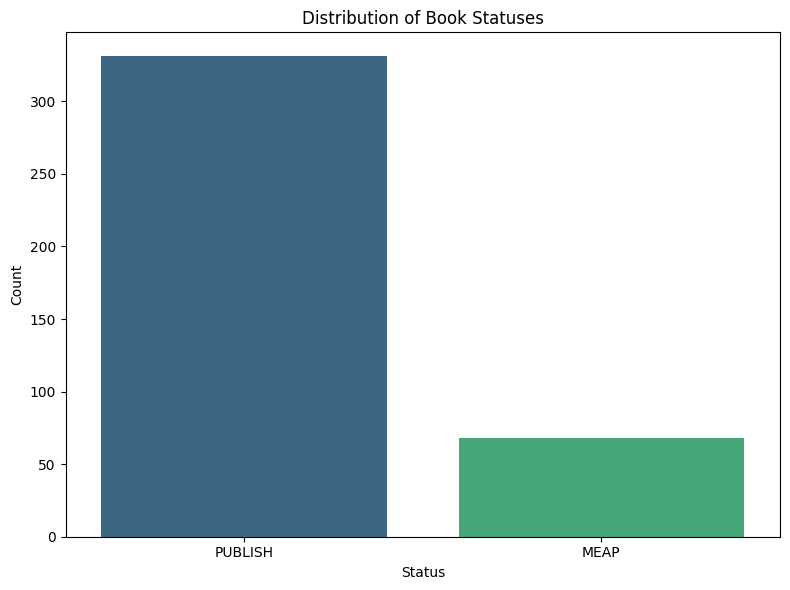

Distribution of Book Statuses:
PUBLISH: 331
MEAP: 68


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each status
status_counts = new_df['status'].value_counts()

# Set up a Matplotlib figure with a size of 8x6 inches for visualizations.
plt.figure(figsize=(8, 6))

# Plot the distribution of book statuses
plt.figure(figsize=(8, 6))
sns.barplot(x=status_counts.index, y=status_counts.values, palette="viridis")

# Add a title to the plot
plt.title('Distribution of Book Statuses')

# Label the x-axis as 'Status'
plt.xlabel('Status')

# Label the y-axis as 'Count'
plt.ylabel('Count')

# Adjust layout to prevent cutting off the figure.
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('distribution_of_book_statuses.png')

# Display the saved plot
plt.show()

# Print the counts of each status
print("Distribution of Book Statuses:")
for status, count in status_counts.items():
    print(f"{status}: {count}")

**DATASET 2**

Covers dataset using the source web:

In [40]:
# Replace 'your_file.csv' with the actual path to your CSV file
json_file_path = 'https://raw.githubusercontent.com/ozlerhakan/mongodb-json-files/master/datasets/covers.json'

# Read the JSON file into a Pandas DataFrame
df1 = pd.read_json(json_file_path, lines=True)

In [41]:
# Dropping the unnecessary column
column_to_drop = ['_id']

# Drop the specified columns
df1 = df1.drop(columns=column_to_drop)

In [42]:
# Display the output of the dataframe
df1

,book_id,ratingcount,ratingval
0,10644930,80,2.0
1,10644930,27,2.1
2,10644930,31,2.2
3,10644930,31,2.3
4,10644930,76,2.4
...,...,...,...
5066,10644930,41,1.5
5067,10644930,27,1.6
5068,10644930,18,1.7
5069,10644930,24,1.8


In [43]:
# Reset the index in both DataFrames
new_df.reset_index(drop=True, inplace=True)
df1.reset_index(drop=True, inplace=True)

# Merge the two DataFrames on the index
merged_df = pd.merge(new_df, df1, left_index=True, right_index=True)

# Display the merged DataFrame
print(merged_df)

     _id                                title  pageCount  \
0      1                    Unlocking Android        416   
1      2    Android in Action, Second Edition        592   
2      3             Specification by Example        289   
3      4                     Flex 3 in Action        576   
4      5                     Flex 4 in Action        600   
..   ...                                  ...        ...   
394  785  Practical Probabilistic Programming        289   
395  786                      Unity in Action        289   
396  794                 Express.js in Action        289   
397  795      Learn Git in a Month of Lunches        289   
398  796                   Understanding SPAs        289   

                publishedDate   status  \
0   2011-01-14 00:00:00-08:00  PUBLISH   
1   2011-01-14 00:00:00-08:00  PUBLISH   
2   2011-01-14 00:00:00-08:00  PUBLISH   
3   2011-01-14 00:00:00-08:00  PUBLISH   
4   2011-01-14 00:00:00-08:00  PUBLISH   
..                        .

In [44]:
# Display the output of the merged dataframe
merged_df

,_id,title,pageCount,publishedDate,status,authors,publishedYear,book_id,ratingcount,ratingval
0,1,Unlocking Android,416,2011-01-14 00:00:00-08:00,PUBLISH,"W. Frank Ableson, Charlie Collins, Robi Sen",2011,10644930,80,2.0
1,2,"Android in Action, Second Edition",592,2011-01-14 00:00:00-08:00,PUBLISH,"W. Frank Ableson, Robi Sen",2011,10644930,27,2.1
2,3,Specification by Example,289,2011-01-14 00:00:00-08:00,PUBLISH,Gojko Adzic,2011,10644930,31,2.2
3,4,Flex 3 in Action,576,2011-01-14 00:00:00-08:00,PUBLISH,"Tariq Ahmed with Jon Hirschi, Faisal Abid",2011,10644930,31,2.3
4,5,Flex 4 in Action,600,2011-01-14 00:00:00-08:00,PUBLISH,"Tariq Ahmed, Dan Orlando, John C. Bland II, Jo...",2011,10644930,76,2.4
...,...,...,...,...,...,...,...,...,...,...
394,785,Practical Probabilistic Programming,289,2011-01-14 00:00:00-08:00,MEAP,Avi Pfeffer,2011,8697395,182,0.7
395,786,Unity in Action,289,2011-01-14 00:00:00-08:00,MEAP,Joseph Hocking,2011,8697395,203,0.8
396,794,Express.js in Action,289,2011-01-14 00:00:00-08:00,MEAP,Evan M. Hahn,2011,8697395,221,0.9
397,795,Learn Git in a Month of Lunches,289,2011-01-14 00:00:00-08:00,MEAP,Rick Umali,2011,8697395,480,1.0


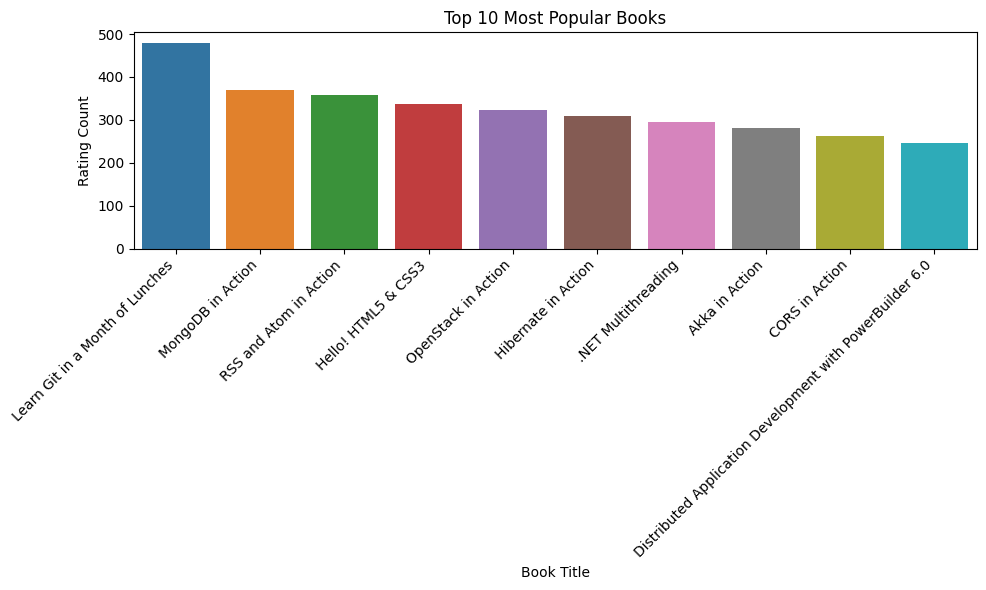


Top 10 Most Popular Books:
Learn Git in a Month of Lunches: Rating Count - 480, Average Rating - 1.00
MongoDB in Action: Rating Count - 369, Average Rating - 3.50
RSS and Atom in Action: Rating Count - 358, Average Rating - 3.50
Hello! HTML5 & CSS3: Rating Count - 337, Average Rating - 2.50
OpenStack in Action: Rating Count - 322, Average Rating - 0.50
Hibernate in Action: Rating Count - 309, Average Rating - 4.00
.NET Multithreading: Rating Count - 294, Average Rating - 3.00
Akka in Action: Rating Count - 280, Average Rating - 3.50
CORS in Action: Rating Count - 263, Average Rating - 3.50
Distributed Application Development with PowerBuilder 6.0: Rating Count - 247, Average Rating - 3.60


In [45]:
# Visualize popularity based on rating count
plt.figure(figsize=(10, 6))

# Create a bar plot where x-axis represents the top 10 book titles with the largest 'ratingcount', and y-axis shows their respective rating counts
sns.barplot(x='title', y='ratingcount', data=merged_df.nlargest(10, 'ratingcount'))

# Add a title to the plot
plt.title('Top 10 Most Popular Books')

# Label the x-axis as 'Book Title'
plt.xlabel('Book Title')

# Label the y-axis as 'Rating Count'
plt.ylabel('Rating Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent cutting off the figure
plt.tight_layout()

# Save the plot as a PNG file before displaying it
plt.savefig('top_10_most_popular_books.png')

# Display the plot
plt.show()

print("\nTop 10 Most Popular Books:")
for index, row in merged_df.nlargest(10, 'ratingcount').iterrows():
    print(f"{row['title']}: Rating Count - {row['ratingcount']}, Average Rating - {row['ratingval']:.2f}")

In [46]:
# Identify highly-rated authors with their average ratings
top_authors_data = merged_df.groupby('authors')['ratingval'].agg(['mean', 'count']).nlargest(5, 'mean')

# Print recommendations
print("Recommendations:")
print("1. Promote popular books with high rating counts.")
print("2. Recognize highly-rated authors:")
for author, data in top_authors_data.iterrows():
    print(f"   - {author}: Average Rating - {data['mean']:.2f}, Number of Books - {data['count']}")

Recommendations:
1. Promote popular books with high rating counts.
2. Recognize highly-rated authors:
   - Bruce Simpson, John Mitchell, Brian Christeson, Rehan Zaidi, , Jonathan Levine: Average Rating - 5.00, Number of Books - 1.0
   - Chuck Lam: Average Rating - 5.00, Number of Books - 1.0
   - Jeffrey Palermo, Ben Scheirman, Jimmy Bogard, Eric Hexter, , Matthew Hinze: Average Rating - 5.00, Number of Books - 1.0
   - Ola Ellnestam, Daniel Brolund: Average Rating - 5.00, Number of Books - 1.0
   - Elijah Meeks: Average Rating - 4.90, Number of Books - 1.0


In [47]:
# Split the authors column to create a separate row for each author
authors_df = merged_df['authors'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('author')
df_split_authors = merged_df.drop('authors', axis=1).join(authors_df)

# Analyze the average ratings and rating counts for books contributed by each author
author_stats = df_split_authors.groupby('author').agg({'ratingval': ['mean', 'count']}).reset_index()
author_stats.columns = ['author', 'average_rating', 'contribution_count']

# Identify authors with the highest average ratings and the most contributions
top_authors_ratings = author_stats.nlargest(5, 'average_rating')

# Identify authors with the lowest average ratings and contribution counts
bottom_authors_contributions = author_stats.nsmallest(5, 'contribution_count')

# Print the results
print("Authors with the Highest Average Ratings:")
print(top_authors_ratings)

print("\nAuthors with the lowest Contributions:")
print(bottom_authors_contributions)

Authors with the Highest Average Ratings:
               author  average_rating  contribution_count
65   Brian Christeson             5.0                   1
72      Bruce Simpson             5.0                   1
102         Chuck Lam             5.0                   1
121    Daniel Brolund             5.0                   1
270     John Mitchell             5.0                   1

Authors with the lowest Contributions:
            author  average_rating  contribution_count
1      Adam Benoit             2.8                   1
2       Adam Chace             4.5                   1
5   Adele Goldberg             0.6                   1
6      Ahmed Sidky             0.4                   1
7  Ajamu A. Wesley             4.5                   1


In [48]:
#Creating output file
csv_file_path = 'output_file.csv'

#Using the to_csv() method to export the DataFrame to a CSV file
merged_df.to_csv(csv_file_path, index=False)